## Optimization & Training

- tf와 layers 패키지 불러오기

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

from tensorflow.keras import datasets

In [ ]:
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


- Basic CNN

In [ ]:
inputs = layers.Input((28, 28, 1))
net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.5)(net)
net = layers.Dense(10)(net)  # num_classes
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

### Optimization
- Loss Function
- Optimization
- Metrics

### Loss Function

#### 이진분류 : Binary   다중분류 : Categorical

In [ ]:
loss = 'binary_crossentropy'
loss = 'categorical_crossentropy'

In [ ]:
tf.keras.losses.binary_crossentropy

<function tensorflow.python.keras.losses.binary_crossentropy>

In [ ]:
tf.keras.losses.categorical_crossentropy

<function tensorflow.python.keras.losses.categorical_crossentropy>

In [ ]:
loss_fun = tf.keras.losses.sparse_categorical_crossentropy

#### One Hot 인코딩이 되지 않았을때 : Sparse

In [ ]:
tf.keras.losses.sparse_categorical_crossentropy

<function tensorflow.python.keras.losses.sparse_categorical_crossentropy>

In [ ]:
sparse_loss_func = tf.keras.losses.sparse_categorical_crossentropy

### Metrics
- 모델을 평가하는 방법
- accuracy를 이름으로 넣는 방법

In [ ]:
metrics = ['accuracy']

- tf.keras.metrics

In [ ]:
tf.keras.metrics.Accuracy()
tf.keras.metrics.Precision()
tf.keras.metrics.Recall()

In [ ]:
metrics = [tf.keras.metrics.Accuracy()]

### Compile
- optimizer 적용 : 'sgd', 'rmsprop', 'adam'
- sgd : tf.keras.optimizers.SGD()
- rmsprop : tf.keras.optimizers.RMSprop()
- adam : tf.keras.optimizers.Adam()

In [ ]:
optm = tf.keras.optimizers.Adam()

- optimizer = tf.keras.optimizers.Adam()
- loss = tf.keras.losses.sparse_categorical_crossentropy
- metrics = tf.keras.metrics.Accuracy()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

---

### Prepare Dataset

In [ ]:
mnist = datasets.mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [ ]:
train_x.shape, train_y.shape

((60000, 28, 28), (60000,))

In [ ]:
test_x.shape, test_y.shape

((10000, 28, 28), (10000,))

입력하는 데이터가 4차원이어야하는데 현재는 train_x의 차원이 3차원 임을 확인해 볼 수 있음

차원 수 늘리기

In [ ]:
import numpy as np

- np.expand_dims( ) 활용

In [ ]:
np.expand_dims(train_x, -1).shape

(60000, 28, 28, 1)

- tf.expand_dims( ) 활용

In [ ]:
tf.expand_dims(train_x, -1).shape

TensorShape([60000, 28, 28, 1])

- tf.newaxis 활용

In [ ]:
train_x = train_x[..., tf.newaxis]
test_x = test_x[..., tf.newaxis]

기존 (60000, 28, 28) -> (60000, 28, 28, 1) 로 변경된 것을 확인할 수 있음

In [ ]:
train_x.shape

(60000, 28, 28, 1)

### Rescaling

In [ ]:
np.min(train_x), np.max(train_x)

(0, 255)

최저의 값이 0, 최대의 값이 255이므로 모든 데이터를 0과 1 사이의 데이터로 바꾸기위해 255로 나누어줌

In [ ]:
train_x = train_x / 255.
test_x = test_x / 255.

In [ ]:
np.min(train_x), np.max(train_x)

(0.0, 1.0)

---

### Training

In [ ]:
hist = model.fit(train_x, train_y, batch_size=32, shuffle=True, epochs=1)

1875/1875 [==============================] - 15s 8ms/step - loss: 0.1495 - sparse_categorical_accuracy: 0.9531


In [ ]:
hist.history

{'loss': [0.14946405589580536],
 'sparse_categorical_accuracy': [0.9530666470527649]}

### Evaluating

- model.evaluate : loss, accuracy 순서대로 나옴

In [ ]:
model.evaluate(test_x, test_y, batch_size=32)

313/313 [==============================] - 1s 5ms/step - loss: 0.0398 - sparse_categorical_accuracy: 0.9865


[0.03977954387664795, 0.9865000247955322]

### 결과 확인
- input으로 들어갈 이미지 데이터 화면

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
test_image = test_x[0, :, :, 0]
test_image.shape

(28, 28)

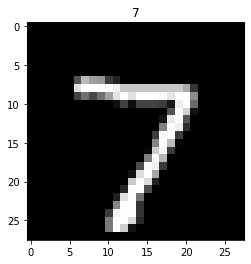

In [ ]:
plt.title(test_y[0])
plt.imshow(test_image, 'gray')
plt.show()

- 모델에 Input Data로 확인 할 이미지 데이터 넣기

In [ ]:
pred = model.predict(test_image.reshape(1, 28, 28, 1))

- 각 라벨이 될 확률 10개
- softmax를 사용하였기에 모든 값을 합하면 1

In [ ]:
pred

array([[5.12877629e-10, 1.41242651e-09, 3.40660611e-09, 5.95750755e-08,
        1.03356178e-10, 6.63809174e-10, 1.81957531e-13, 9.99999762e-01,
        6.76751877e-10, 1.04876676e-07]], dtype=float32)

In [ ]:
pred.shape

(1, 10)

- np.argmax

In [ ]:
np.argmax(pred)

7

### Test Batch
- Batch로 Test DataSet 넣기

In [ ]:
test_batch = test_x[:32]
test_batch.shape

(32, 28, 28, 1)

모델에 넣어보기

In [39]:
preds = model.predict(test_batch)
preds

array([[5.12879572e-10, 1.41243184e-09, 3.40661921e-09, 5.95753065e-08,
        1.03356573e-10, 6.63811728e-10, 1.81957531e-13, 9.99999762e-01,
        6.76755763e-10, 1.04877088e-07],
       [1.22731512e-06, 8.27563872e-06, 9.99983668e-01, 3.74694963e-07,
        6.39378399e-08, 1.59321745e-09, 5.37697406e-06, 1.02133406e-07,
        8.29560349e-07, 4.03613143e-09],
       [7.88310643e-08, 9.99979258e-01, 1.09033543e-07, 5.08561770e-09,
        1.32094401e-05, 4.87317436e-07, 3.53993596e-06, 2.78577386e-06,
        4.17508147e-07, 9.93002160e-08],
       [9.99998569e-01, 4.06707779e-10, 2.17561524e-08, 5.53026203e-09,
        9.71897229e-09, 8.11925105e-09, 2.83240183e-07, 3.68579229e-08,
        7.47447132e-07, 3.54668003e-07],
       [1.37720919e-08, 9.87609923e-08, 9.81551622e-08, 4.82596452e-09,
        9.99941468e-01, 6.47657927e-09, 7.20846671e-08, 9.20325434e-08,
        5.85015925e-07, 5.76237871e-05],
       [2.67823221e-08, 9.99994516e-01, 1.50747557e-08, 5.94170768e-10,
   

preds, -1 해주어야 모든 데이터에 대한 결과를 볼 수 있음

In [40]:
np.argmax(preds, -1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1])

In [42]:
pred_labels = np.argmax(preds, -1)
pred_labels

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1])

In [41]:
np.argmax(preds, -1).shape

(32,)

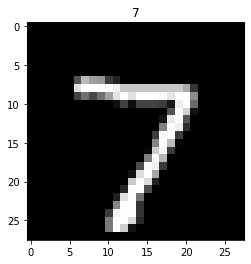

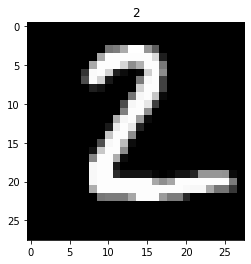

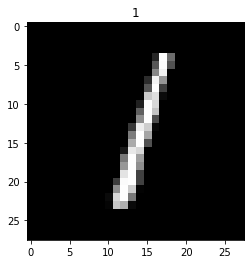

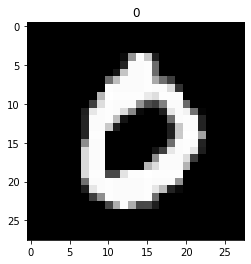

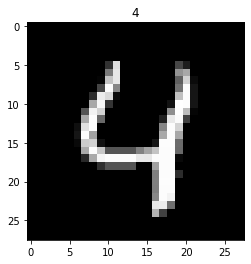

In [43]:
for i in range(5):
    plt.imshow(test_batch[i, :, :, 0], 'gray')
    plt.title(pred_labels[i])
    plt.show()